In [1]:
#-------------- Link for dataset ------------------------#
#https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?resource=download&select=movies_metadata.csv


# I - Content based filtering 

In [2]:
import pandas as pd
from ast import literal_eval
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.5f" % x)
pd.set_option('display.expand_frame_repr', False)

## 1) Fetching dataset 

In [3]:
credits = pd.read_csv('credits.csv', low_memory=False)
keywords = pd.read_csv('keywords.csv', low_memory=False)
links = pd.read_csv('links.csv', low_memory=False)
ratings = pd.read_csv('ratings.csv', low_memory=False)
movies = pd.read_csv('movies_metadata.csv', low_memory=False)

In [4]:
movies['id'] = movies['id'].str.extract('(\d+)')
movies['id'] = movies['id'].astype(float)
movies['id'] = movies['id'].astype(int)
credits.columns = ['cast','crew', 'id']
movies = movies.merge(credits,on='id')

keywords.columns = ['id', 'keywords']
movies = movies.merge(keywords,on='id')


In [5]:
movies


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00000,81.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70000,5415.00000,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.00000,104.00000,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90000,2413.00000,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.00000,101.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.50000,92.00000,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.00000,127.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.10000,34.00000,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.00000,106.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.70000,173.00000,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46626,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.00000,90.00000,"[{'iso_639_1

In [6]:
print("Number of movies and number of information per movie (movie, feature) : ",movies.shape,"\n")
movies.info()

Number of movies and number of information per movie (movie, feature) :  (46631, 27) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46631 entries, 0 to 46630
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  46631 non-null  object 
 1   belongs_to_collection  4577 non-null   object 
 2   budget                 46631 non-null  object 
 3   genres                 46631 non-null  object 
 4   homepage               8012 non-null   object 
 5   id                     46631 non-null  int32  
 6   imdb_id                46614 non-null  object 
 7   original_language      46620 non-null  object 
 8   original_title         46631 non-null  object 
 9   overview               45636 non-null  object 
 10  popularity             46625 non-null  object 
 11  poster_path            46232 non-null  object 
 12  production_companies   46627 non-null  object 
 13  production_countrie

In [7]:
# check null value in dataset
movies.isnull().sum()

adult                        0
belongs_to_collection    42054
budget                       0
genres                       0
homepage                 38619
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   995
popularity                   6
poster_path                399
production_companies         4
production_countries         4
release_date                88
revenue                      7
runtime                    271
spoken_languages             7
status                      89
tagline                  25848
title                        7
video                        7
vote_average                 7
vote_count                   7
cast                         0
crew                         0
keywords                     0
dtype: int64

In [8]:
# check for duplicate values
movies.duplicated().sum()

1172

In [9]:
# check for duplicate values
movies['title'].duplicated().sum()

4354

## 3) Preprocessing data 

In [10]:
movies.drop_duplicates(inplace=True)

In [11]:
movies['title'].drop_duplicates(inplace=True)

In [12]:
# Replace the Nan with ''
movies.fillna('', inplace=True)
# tagline
movies['tagline'] = movies['tagline'].fillna('')


## 4) Cleaning data

In [13]:
# dropping uneccessary feature
data = movies.drop(["homepage", "belongs_to_collection", "imdb_id", "poster_path", "status", "video", "spoken_languages", "title"], axis=1)
# get rid of duplicates with same release date
data.drop_duplicates(subset=["original_title","release_date"], inplace=True)


In [14]:
stemmer = PorterStemmer()

#extracting genre names
data['genres'] = data['genres'].apply(literal_eval)
data['genres'] = data['genres'].apply(lambda x : [i['name'] for i in x])
data['genres'] = data['genres'].apply(lambda x : list(set(x)))
#keywords
data['keywords'] = data['keywords'].apply(literal_eval)
data['keywords'] = data['keywords'].apply(lambda x : [i['name'] for i in x])
data['keywords'] = data['keywords'].apply(lambda x: [stemmer.stem(i) for i in x])
data['keywords'] = data['keywords'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])
data['keywords'] = data['keywords'].apply(lambda x : list(set(x)))

data['cast'] = data['cast'].apply(literal_eval)
data['crew'] = data['crew'].apply(literal_eval)
data['top_crew'] = data['cast'].apply(lambda x : [i['name'] for i in x])
# Here we are taking top 2 crews
data['top_crew'] = data['top_crew'].apply(lambda x : x[:2])

# Geting director Name
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return ""
data['director'] = data['crew'].apply(get_director)
imp_cols = ['tagline', 'genres' ,'original_language' ,'keywords' ,'top_crew','director']

#-------------------------------------------------------------#
#Extracting Digit from column
data['budget']=data['budget'].str.extract('(\d+)')
data['budget']=data['budget'].astype(float)
data['budget']=data['budget'].astype(int)
rev = []
for i in data['vote_count'].values:
    if i != '':
        rev.append(float(i))
    else:
        rev.append(0.0)
    
data['vote_count']=rev

rev = []
for i in data['vote_average'].values:
    if i != '':
        rev.append(float(i))
    else:
        rev.append(0.0)
    
data['vote_average']=rev

rev = []
for i in data['runtime'].values:
    if i != '':
        rev.append(float(i))
    else:
        rev.append(0.0)
    
data['runtime']=rev

data = data.drop(["cast", "crew"], axis=1)

### Display basic information 

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45435 entries, 0 to 46630
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45435 non-null  object 
 1   budget                45435 non-null  int32  
 2   genres                45435 non-null  object 
 3   id                    45435 non-null  int32  
 4   original_language     45435 non-null  object 
 5   original_title        45435 non-null  object 
 6   overview              45435 non-null  object 
 7   popularity            45435 non-null  object 
 8   production_companies  45435 non-null  object 
 9   production_countries  45435 non-null  object 
 10  release_date          45435 non-null  object 
 11  revenue               45435 non-null  object 
 12  runtime               45435 non-null  float64
 13  tagline               45435 non-null  object 
 14  vote_average          45435 non-null  float64
 15  vote_count         

In [16]:
data

,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,vote_average,vote_count,keywords,top_crew,director
0,False,30000000,"[Family, Animation, Comedy]",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00000,81.00000,,7.70000,5415.00000,"[boy, friend, newtoy, toycomestolif, jealousi,...","[Tom Hanks, Tim Allen]",John Lasseter
1,False,65000000,"[Family, Adventure, Fantasy]",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.00000,104.00000,Roll the dice and unleash the excitement!,6.90000,2413.00000,"[basedonchildren'sbook, giantinsect, boardgam,...","[Robin Williams, Jonathan Hyde]",Joe Johnston
2,False,0,"[Romance, Comedy]",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.00000,101.00000,Still Yelling. Still Fighting. Still Ready for...,6.50000,92.00000,"[fish, duringcreditssting, oldmen, bestfriend]","[Walter Matthau, Jack Lemmon]",Howard Deutch
3,False,16000000,"[Drama, Romance, Comedy]",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.00000,127.00000,Friends are the people who let you be yourself...,6.10000,34.00000,"[chickflick, interracialrelationship, singlemo...","[Whitney Houston, Angela Bassett]",Forest Whitaker
4,False,0,[Comedy],11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.00000,106.00000,Just When His World Is Back To Normal... He's ...,5.70000,173.00000,"[motherdaughterrelationship, gynecologist, con...","[Steve Martin, Diane Keaton]",Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46626,False,0,"[Family, Drama]",439050,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",,0.00000,90.00000,Rising and falling between a man and woman,4.00000,1.00000,[tragiclov],"[Leila Hatami, Kourosh Tahami]",Hamid Nematollah
46627,False,0,[Drama],111109,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.00000,360.00000,,9.00000,3.00000,"[pinoy, artist, play]","[Angel Aquino, Perry Dizon]",Lav Diaz
46628,False,0,"[Drama, Thriller, Action]",67758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.00000,90.00000,A deadly game of wits.,3.80000,6.00000,[],"[Erika Eleniak, Adam Baldwin]",Mark L. Lester
46629,False,0,[],227506,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.00000,87.00000,,0.00000,0.00000,[],"[Iwan Mosschuchin, Nathalie Lissenko]",Yakov Protazanov


In [17]:
data.to_csv('movies_complete_with_index.csv', index=True)

In [18]:
# Different Unique Genre count
temp=[]
for i in data['genres']:
    for j in i:
        temp.append(j)   # add it to temp list and get the unique genre using set
unique_genre = list(set(temp))  
movies_count = []

for gen in unique_genre:
    count=0
    for i in data['genres']:
        if gen in i:
            count = count+1
    movies_count.append([gen,count])  

movies_count  

data_genre = pd.DataFrame(data=movies_count,columns=['genre_name','count'])

Text(0, 0.5, 'Movies Count')

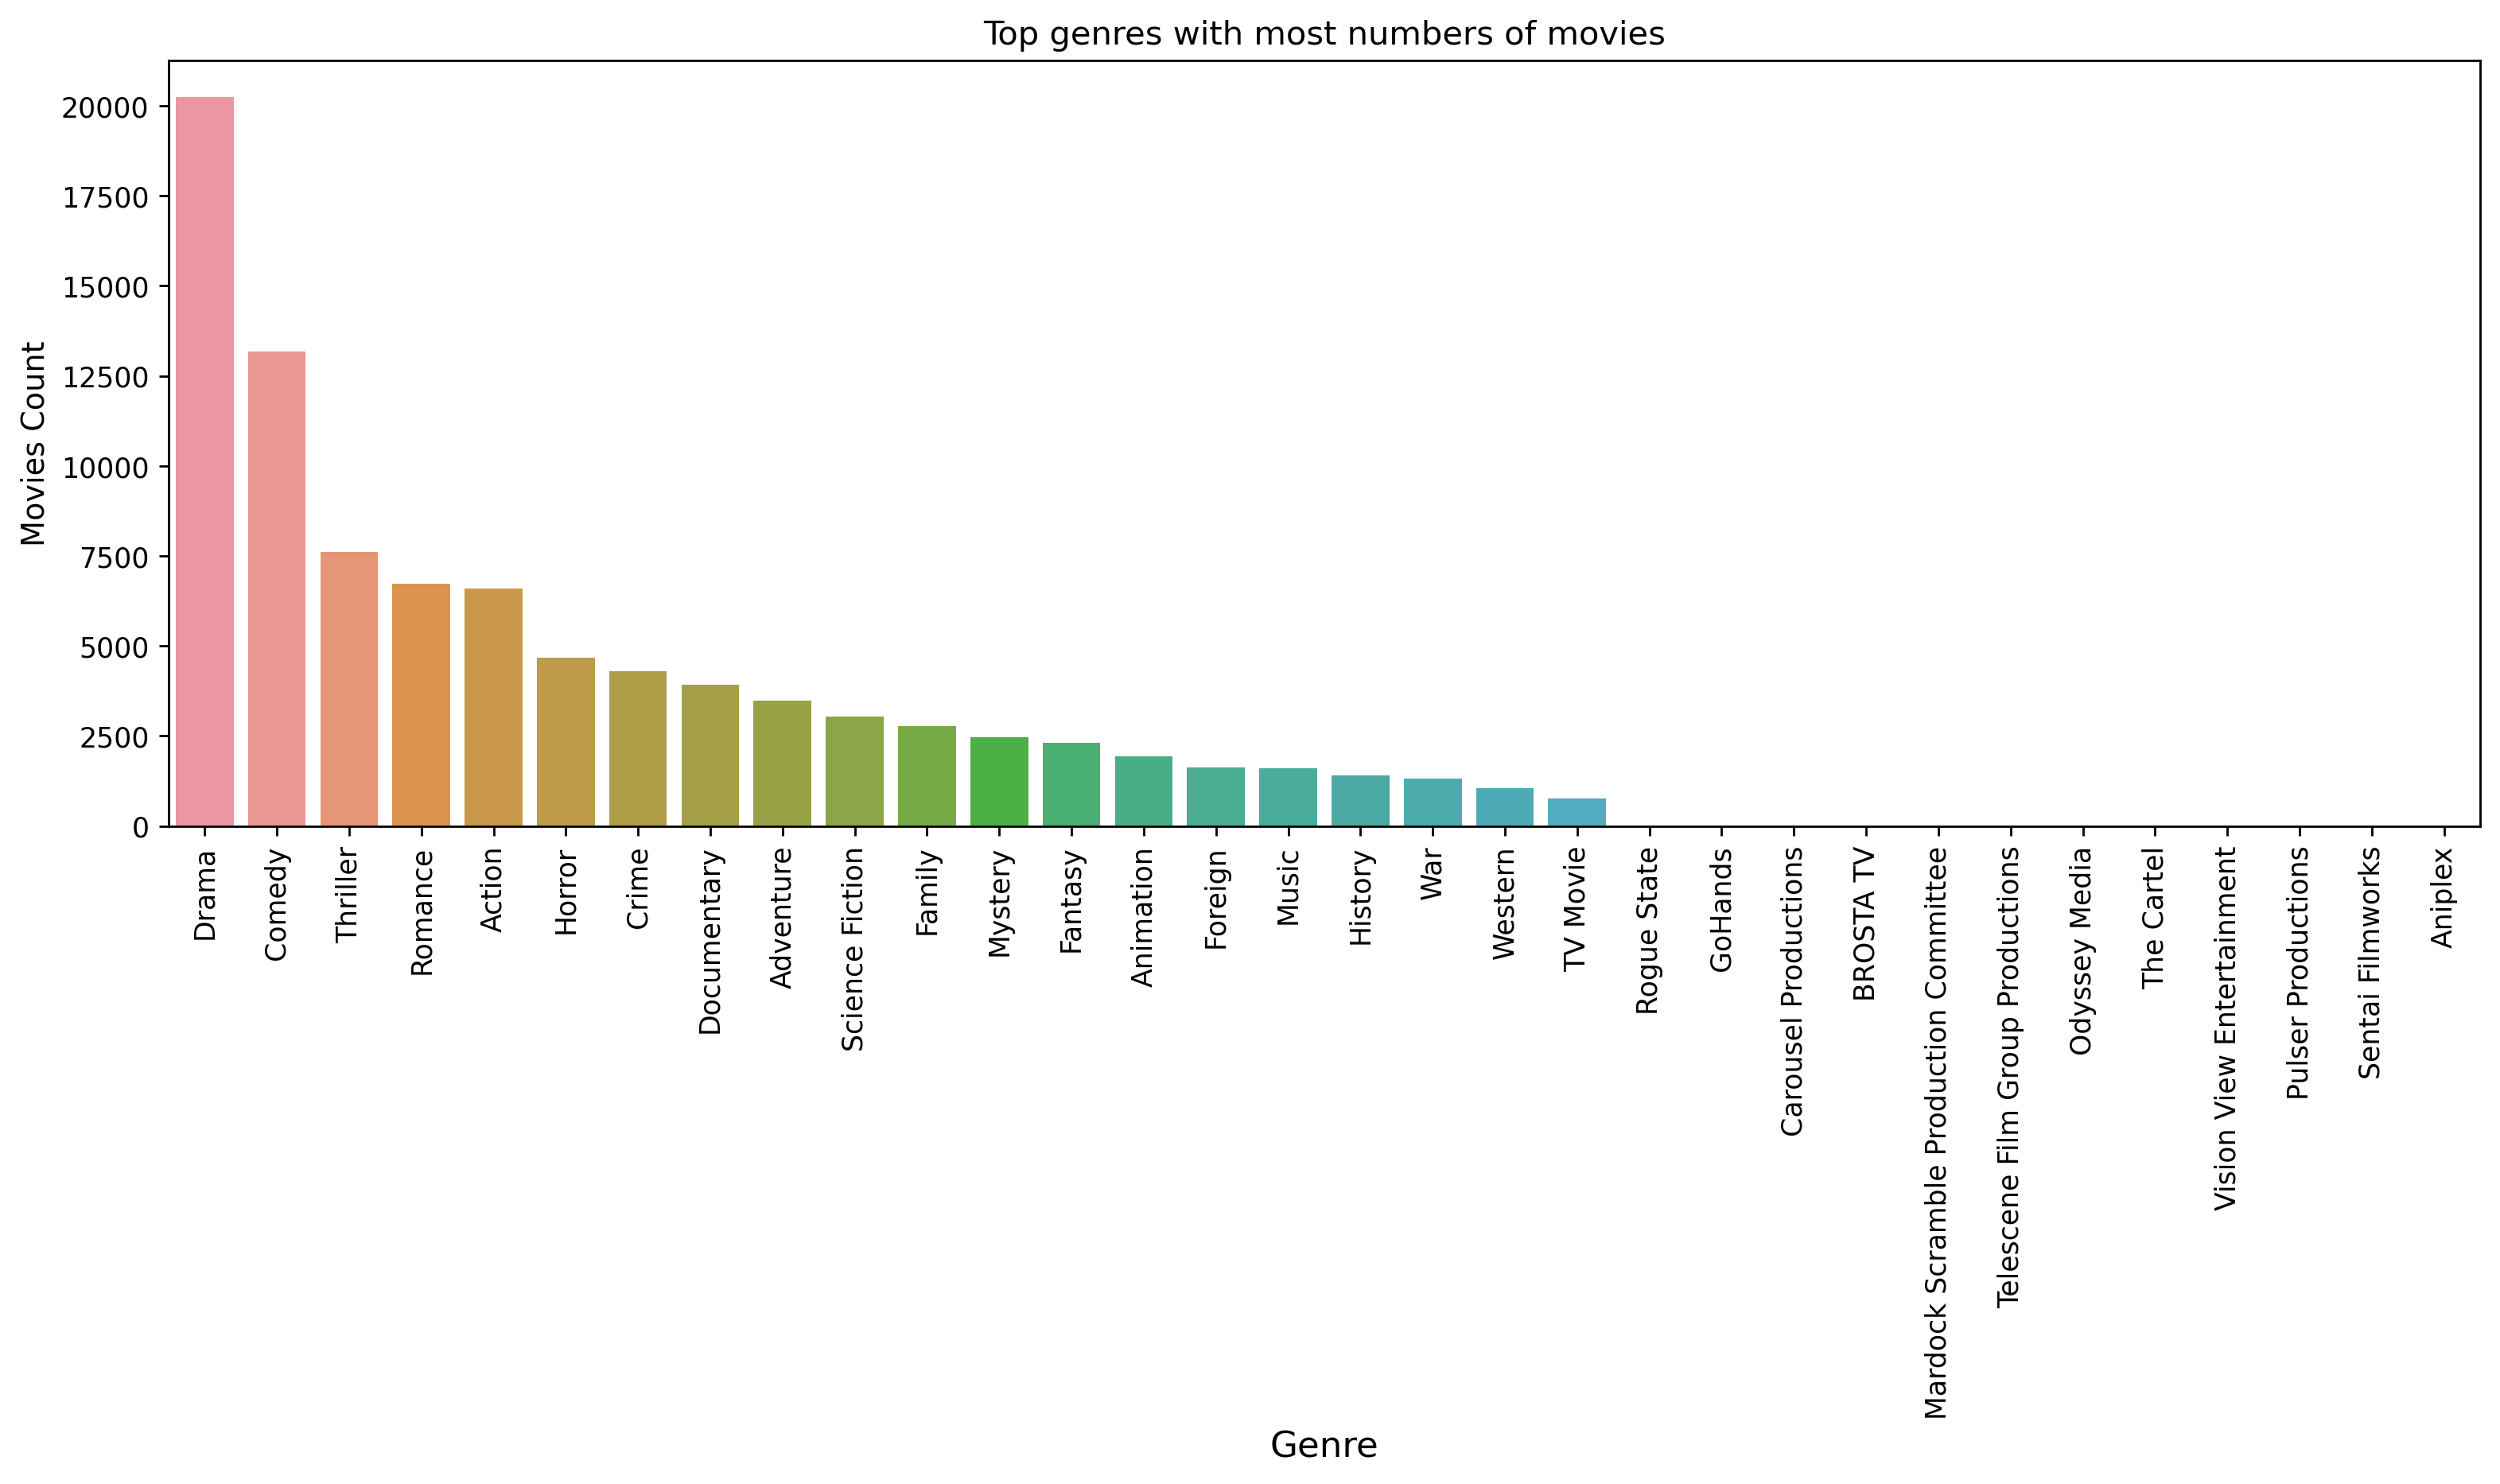

In [19]:
#Find the Distribution of number of movies in each genre with bar graph
plt.figure(figsize=(15,5),dpi=250)
data_genre=data_genre.sort_values(by='count',ascending = False)
sns.barplot(x=data_genre['genre_name'],y=data_genre['count'])
plt.title('Top genres with most numbers of movies')
#Change the rotation of xticks so it fits properly the chart
plt.xticks(rotation = 90)
plt.xlabel("Genre", fontsize = 13)  # Set X label                              
plt.ylabel("Movies Count", fontsize = 11)  # Set Y label

In [20]:
#most voted Movie in the dataset
data.sort_values(by=['vote_count'],ascending=False)[['original_title','vote_count']][:10]

,original_title,vote_count
15654,Inception,14075.00000
12591,The Dark Knight,12269.00000
14726,Avatar,12114.00000
18011,The Avengers,12000.00000
26782,Deadpool,11444.00000
23079,Interstellar,11187.00000
20257,Django Unchained,10297.00000
23951,Guardians of the Galaxy,10014.00000
2870,Fight Club,9678.00000
18437,The Hunger Games,9634.00000


In [21]:
pd.set_option('mode.chained_assignment', None) #disabling SettingWithCopyWarning warning
#Combining all required columns into Onecleaned_data1 = cleaned_data[imp_cols]
cleaned_data = data[imp_cols]

cleaned_data['tagline'] = cleaned_data['tagline'].apply(lambda x : [x])
cleaned_data['original_language'] = cleaned_data['original_language'].apply(lambda x : [x])
cleaned_data['director'] = cleaned_data['director'].apply(lambda x : [x])

cleaned_data['combine'] = cleaned_data['genres'] + cleaned_data['original_language'] +\
                        cleaned_data['keywords'] + cleaned_data['top_crew'] +\
                        cleaned_data['director']
cleaned_data['combine'] = cleaned_data['combine'].apply(lambda x: ' '.join(x))
cleaned_data

,tagline,genres,original_language,keywords,top_crew,director,combine
0,[],"[Family, Animation, Comedy]",[en],"[boy, friend, newtoy, toycomestolif, jealousi,...","[Tom Hanks, Tim Allen]",[John Lasseter],Family Animation Comedy en boy friend newtoy t...
1,[Roll the dice and unleash the excitement!],"[Family, Adventure, Fantasy]",[en],"[basedonchildren'sbook, giantinsect, boardgam,...","[Robin Williams, Jonathan Hyde]",[Joe Johnston],Family Adventure Fantasy en basedonchildren'sb...
2,[Still Yelling. Still Fighting. Still Ready fo...,"[Romance, Comedy]",[en],"[fish, duringcreditssting, oldmen, bestfriend]","[Walter Matthau, Jack Lemmon]",[Howard Deutch],Romance Comedy en fish duringcreditssting oldm...
3,[Friends are the people who let you be yoursel...,"[Drama, Romance, Comedy]",[en],"[chickflick, interracialrelationship, singlemo...","[Whitney Houston, Angela Bassett]",[Forest Whitaker],Drama Romance Comedy en chickflick interracial...
4,[Just When His World Is Back To Normal... He's...,[Comedy],[en],"[motherdaughterrelationship, gynecologist, con...","[Steve Martin, Diane Keaton]",[Charles Shyer],Comedy en motherdaughterrelationship gynecolog...
...,...,...,...,...,...,...,...
46626,[Rising and falling between a man and woman],"[Family, Drama]",[fa],[tragiclov],"[Leila Hatami, Kourosh Tahami]",[Hamid Nematollah],Family Drama fa tragiclov Leila Hatami Kourosh...
46627,[],[Drama],[tl],"[pinoy, artist, play]","[Angel Aquino, Perry Dizon]",[Lav Diaz],Drama tl pinoy artist play Angel Aquino Perry ...
46628,[A deadly game of wits.],"[Drama, Thriller, Action]",[en],[],"[Erika Eleniak, Adam Baldwin]",[Mark L. Lester],Drama Thriller Action en Erika Eleniak Adam Ba...
46629,[],[],[en],[],"[Iwan Mosschuchin, Nathalie Lissenko]",[Yakov Protazanov],en Iwan Mosschuchin Nathalie Lissenko Yakov Pr...


In [22]:
part_data = cleaned_data.head(20000)
part_data

,tagline,genres,original_language,keywords,top_crew,director,combine
0,[],"[Family, Animation, Comedy]",[en],"[boy, friend, newtoy, toycomestolif, jealousi,...","[Tom Hanks, Tim Allen]",[John Lasseter],Family Animation Comedy en boy friend newtoy t...
1,[Roll the dice and unleash the excitement!],"[Family, Adventure, Fantasy]",[en],"[basedonchildren'sbook, giantinsect, boardgam,...","[Robin Williams, Jonathan Hyde]",[Joe Johnston],Family Adventure Fantasy en basedonchildren'sb...
2,[Still Yelling. Still Fighting. Still Ready fo...,"[Romance, Comedy]",[en],"[fish, duringcreditssting, oldmen, bestfriend]","[Walter Matthau, Jack Lemmon]",[Howard Deutch],Romance Comedy en fish duringcreditssting oldm...
3,[Friends are the people who let you be yoursel...,"[Drama, Romance, Comedy]",[en],"[chickflick, interracialrelationship, singlemo...","[Whitney Houston, Angela Bassett]",[Forest Whitaker],Drama Romance Comedy en chickflick interracial...
4,[Just When His World Is Back To Normal... He's...,[Comedy],[en],"[motherdaughterrelationship, gynecologist, con...","[Steve Martin, Diane Keaton]",[Charles Shyer],Comedy en motherdaughterrelationship gynecolog...
...,...,...,...,...,...,...,...
20207,[],[Documentary],[en],[],[Pedro Costa],[Aurélien Gerbault],Documentary en Pedro Costa Aurélien Gerbault
20208,[],[Drama],[en],[],"[Dennis Farina, Jamie Anne Allman]",[Joe Maggio],Drama en Dennis Farina Jamie Anne Allman Joe M...
20209,[],"[Romance, Comedy]",[cn],[slapstick],"[Chow Yun-fat, Anita Mui]",[Kenny Bee],Romance Comedy cn slapstick Chow Yun-fat Anita...
20210,[],[Drama],[fr],"[faith, pagan]","[Lana Turner, Edmund Purdom]",[Richard Thorpe],Drama fr faith pagan Lana Turner Edmund Purdom...


In [23]:
#Transformation of the data in required fashion using Count vectorizer making ngrams
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = count.fit_transform(part_data['combine'])

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [25]:
data = data.reset_index()
titles = data['original_title']
indices = pd.Series(data.index, index=data['original_title'])


In [26]:
index_movie_id = data[['index','id']]

In [27]:
def get_content_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = data.iloc[movie_indices][['original_title', 'vote_count', 'vote_average']]
    
    print("\nRecommended movies for <<", title, ">> are : ")
    
    return movies

In [28]:
get_content_recommendations('Halo Legends')


Recommended movies for << Halo Legends >> are : 


,original_title,vote_count,vote_average
15035,Spiderman: The Ultimate Villain Showdown,3.00000,5.20000
16499,Gen 13,7.00000,5.50000
9986,Mutant Aliens,4.00000,7.80000
19851,Rejsen til Saturn,10.00000,4.90000
14129,Green Lantern: First Flight,102.00000,6.30000
9407,Katedra,16.00000,7.40000
18285,G.I. Joe: The Revenge of Cobra,3.00000,8.00000
240,Gumby: The Movie,2.00000,5.00000
19060,Iria: Zeiram the Animation,3.00000,8.00000
9609,アップルシード,116.00000,6.80000


# II - Collaborative filtering

In [29]:
from surprise import Dataset, Reader
from surprise.prediction_algorithms.knns import KNNBasic
from surprise import accuracy
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from tqdm import tqdm
import random

In [30]:
# movie dataframe with votes more than 100
movies['vote_count'] = pd.to_numeric(movies['vote_count'], errors='coerce')
movie_md = movies[movies['vote_count'] > 100][['id', 'original_title']]
# IDs of movies with count more than 100
movie_ids = [int(x) for x in movie_md['id'].values]

# Select ratings of movies with more than 55 counts
ratings = ratings[ratings['movieId'].isin(movie_ids)]

# Reset Index
ratings.reset_index(inplace=True, drop=True)

ratings

,userId,movieId,rating,timestamp
0,1,110,1.00000,1425941529
1,1,147,4.50000,1425942435
2,1,858,5.00000,1425941523
3,1,1246,5.00000,1425941556
4,1,1968,4.00000,1425942148
...,...,...,...,...
6527903,270896,5902,4.50000,1257034264
6527904,270896,8665,4.00000,1257031889
6527905,270896,8874,4.50000,1257033950
6527906,270896,8961,3.50000,1257033870


In [31]:
# Initialize a surprise reader object
reader = Reader(line_format='user item rating', sep=',', rating_scale=(0,5), skip_lines=1)

# Load the data
data_md = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader=reader)

# Build trainset object(perform this only when you are using whole dataset to train)
trainset = data_md.build_full_trainset()

## II.1 - Item-based collaborative filtering 

In [32]:
#Declaring the similarity options.
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find similar items
sim_item = KNNBasic(sim_options=sim_options, verbose=False, random_state=33)

# Train the algorithm on the trainset, and predict ratings for the testset
sim_item.fit(trainset)

In [33]:
#predicting rating for a sample user with an interacted product.
sim_item.predict(uid=2,iid=17,r_ui=5.0)

sim_item.predict(uid=671,iid=4011,r_ui=4.0)

Prediction(uid=671, iid=4011, r_ui=4.0, est=4.54317231049118, details={'actual_k': 3, 'was_impossible': False})

## II.2 - User-based collaborative filtering 

In [35]:
#Declaring the similarity options.
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find similar items
sim_user = KNNBasic(sim_options=sim_options, verbose=False, random_state=33)

# Train the algorithm on the trainset, and predict ratings for the testset
sim_user.fit(trainset)

MemoryError: Unable to allocate 492. GiB for an array with shape (257051, 257051) and data type float64

In [ ]:
#predicting rating for a sample user with an interacted product.
sim_user.predict(uid=2,iid=17,r_ui=5.0)

sim_user.predict(uid=671,iid=4011,r_ui=4.0)

## II.3 - Collaborative based algorithm 

In [ ]:
def get_collaborative_recommendations(user_id=1, top_n=5,sim):
    
    # creating an empty list to store the recommended product ids
    recommendations = []
    
    # creating an user item interactions matrix 
    user_movie_interactions_matrix = ratings.pivot(index='userId', columns='movieId', values='rating')
    
    # extracting those product ids which the user_id has not interacted yet
    non_interacted_movies = user_movie_interactions_matrix.loc[user_id][user_movie_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # looping through each of the product ids which user_id has not interacted yet
    for item_id in non_interacted_movies:
        
        # predicting the ratings for those non interacted product ids by this user
        est = sim.predict(user_id, item_id).est
        # appending the predicted ratings
        movie_name = movie_md[movie_md['id']==str(item_id)]['original_title'].values[0]
        recommendations.append((movie_md['id'],est))

    # sorting the predicted ratings in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n] # returning top n highest predicted rating products for this user

In [ ]:
print("Item-based collaborative recommendation")

In [ ]:
get_collaborative_recommendations(random.randint(1, 270896),sim_item)

In [ ]:
print("User-based collaborative recommendation")

In [ ]:
get_collaborative_recommendations(random.randint(1, 270896),sim_user)